In [1]:
import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# import seaborn as sns
# sns.set_style("white")
# sns.set_context("talk")

from pypolyagamma import BernoulliRegression

In [2]:
### Set some basic parameters
D_latent = 2    # Latent dimension
D_obs = 1       # Observed dimension
N = 1000        # Number of datapoints

### Make a regression model and simulate data
true_reg = BernoulliRegression(D_obs, D_latent)
X = np.random.randn(N, D_latent)
y = true_reg.rvs(x=X)
yv = y.ravel()

In [3]:
### Make a test regression and fit it with Gibbs sampling
test_reg = BernoulliRegression(D_obs, D_latent)

def _collect(r):
    return r.A.copy(), r.b.copy(), r.log_likelihood((X, y)).sum()

def _update(r):
    r.resample((X,y))
    return _collect(r)

smpls = [_collect(test_reg)]
for itr in range(100):
    if itr % 10 == 0:
        print("Iter: {0}".format(itr))
    smpls.append(_update(test_reg))

smpls = zip(*smpls)
As, bs, lps = tuple(map(np.array, smpls))

Iter: 0
Iter: 10
Iter: 20
Iter: 30
Iter: 40
Iter: 50
Iter: 60
Iter: 70
Iter: 80
Iter: 90


In [4]:
### Make a test regression and fit it with maximum likelihood
print("Fitting with maximum likelihood")
ml_reg = BernoulliRegression(D_obs, D_latent)
ml_reg.max_likelihood(data=(X,y))
print("Done")

Fitting with maximum likelihood
Done


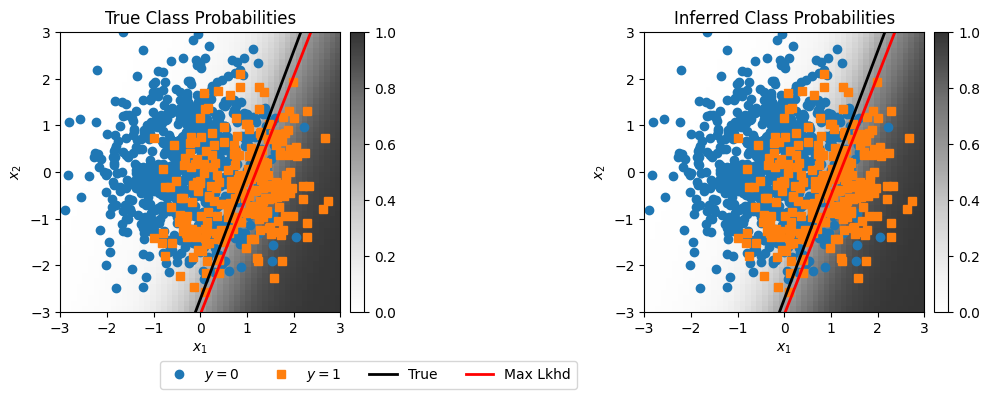

In [5]:
### Plot the regression results
fig = plt.figure(figsize=(10,6))
lim = (-3, 3)
npts = 50
x1, x2 = np.meshgrid(np.linspace(*lim, npts), np.linspace(*lim, npts))

ax1 = plt.subplot(121)
mu = true_reg.mean(np.column_stack((x1.ravel(), x2.ravel())))
plt.imshow(mu.reshape((npts, npts)),
           cmap="Greys", vmin=-0, vmax=1,
           alpha=0.8,
           extent=lim + tuple(reversed(lim)))
plt.plot(X[yv==0,0], X[yv==0,1], 'o', markersize=6, label="$y=0$")
plt.plot(X[yv==1,0], X[yv==1,1], 's', markersize=6, label="$y=1$")

# Draw the true hyperplane
xx = np.linspace(*lim, 100)
yy_true = -(true_reg.A[0, 0] * xx + true_reg.b[0]) / true_reg.A[0, 1]
plt.plot(xx, yy_true, '-k', lw=2, label="True")

# Draw the ML hyperplane
yy_ml = -(ml_reg.A[0,0] * xx  + ml_reg.b[0]) / ml_reg.A[0,1]
plt.plot(xx, yy_ml,'-r', lw=2, label="Max Lkhd")

plt.xlim(lim)
plt.ylim(lim)

# Legend
plt.legend(loc="upper center", ncol=4, bbox_to_anchor=[0.6, 0, 1., -.15])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("True Class Probabilities")

divider = make_axes_locatable(ax1)
cax = divider.new_horizontal(size="5%", pad=0.1)
fig.add_axes(cax)
plt.colorbar(cax=cax)

ax2 = plt.subplot(122)
mu = test_reg.mean(np.column_stack((x1.ravel(), x2.ravel())))
plt.imshow(mu.reshape((npts, npts)),
           cmap="Greys", vmin=0, vmax=1,
           alpha=0.8,
           extent=lim + tuple(reversed(lim)))
plt.plot(X[yv==0,0], X[yv==0,1], 'o', markersize=6, label="$y=0$")
plt.plot(X[yv==1,0], X[yv==1,1], 's', markersize=6, label="$y=1$")

# Draw the ML hyperplane
plt.plot(xx, yy_true, '-k', lw=2, label="True")
plt.plot(xx, yy_ml,'-r', lw=2, label="Max Lkhd")

plt.xlim(lim)
plt.ylim(lim)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Inferred Class Probabilities")

divider = make_axes_locatable(ax2)
cax = divider.new_horizontal(size="5%", pad=0.1)
fig.add_axes(cax)
plt.colorbar(cax=cax)

plt.tight_layout()
#plt.savefig("aux/bernoulli_regression.png")

plt.show()

In [6]:
### Print the true and inferred parameters
print("True A: {}".format(true_reg.A))
print("Mean A: {}".format(As.mean(0)))

print("True b: {}".format(true_reg.b))
print("Mean b: {}".format(bs.mean(0)))

True A: [[ 1.62434536 -0.61175641]]
Mean A: [[ 1.69704444 -0.6023015 ]]
True b: [[-1.67022573]]
Mean b: [[-1.65629825]]
